In [1]:
import nilearn

In [2]:
from nilearn.image import smooth_img

In [3]:
import nibabel as nib

In [4]:
img = nib.load('ds000113b_R2.0.1/sub-02/func/sub-02_task-auditoryperception_run-02_bold.nii.gz')

In [5]:
import nibabel as nib
import numpy as np
from subprocess import call

# Load fMRI data
fmri_data = nib.load('ds000113b_R2.0.1/sub-02/func/sub-02_task-auditoryperception_run-02_bold.nii.gz')
fmri = fmri_data.get_fdata()

# Create brain mask using FSL's BET (Brain Extraction Tool)
call(['bet', 'fmri_volume.nii.gz', 'brain', '-f', '0.5', '-g', '0'])

# Load brain mask
mask_data = nib.load('brain_mask.nii.gz')
mask = mask_data.get_fdata()

# Apply mask to fMRI data
masked_fmri = np.multiply(fmri, mask)

# Save masked fMRI data
nib.save(nib.Nifti1Image(masked_fmri, fmri_data.affine), 'masked_fmri.nii.gz')


FileNotFoundError: [Errno 2] No such file or directory: 'bet'

In [ ]:
print(img)

In [ ]:
data = img.get_fdata()

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(data[:, :, 9, 0].T, cmap='Greys_r')
print(data.shape)

In [ ]:
data.mean()/len(data[data != 0])

In [ ]:
plt.imshow(data[:, :, 9, 0].T - data.mean(), cmap='Greys_r')

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ds000113b_R2.0.1/sub-03/func/sub-03_task-auditoryperception_run-01_events.tsv', sep='\t')

In [3]:
df

,onset,duration,trial_type,run,run_id,volume,run_volume,stim,genre,delay,catch,sound_soa,trigger_ts
0,0.07,6.0,country,1,5,0,0,country_003.wav,country,8,1,0.0722,339.7213
1,14.06,6.0,metal,1,5,7,7,metal_004.wav,metal,6,0,0.0572,353.7221
2,26.05,6.0,ambient,1,5,13,13,ambient_004.wav,ambient,6,0,0.0483,365.7214
3,38.05,6.0,symphonic,1,5,19,19,symphonic_002.wav,symphonic,6,0,0.0500,377.7214
4,50.03,6.0,country,1,5,25,25,country_002.wav,country,6,0,0.0334,389.7219
5,62.05,6.0,rocknroll,1,5,31,31,rocknroll_001.wav,rocknroll,4,0,0.0510,401.7223
6,72.03,6.0,symphonic,1,5,36,36,symphonic_004.wav,symphonic,4,0,0.0334,411.7215
7,82.04,6.0,symphonic,1,5,41,41,symphonic_001.wav,symphonic,8,1,0.0419,421.7217
8,96.06,6.0,rocknroll,1,5,48,48,rocknroll_003.wav,rocknroll,6,0,0.0559,435.7213
9,108.04,6.0,metal,1,5,54,54,metal_000.wav,metal,8,1,0.0400,447.7214


In [ ]:
# 286 - df['delay'].sum() + df['catch'].sum()

In [ ]:
img_1 = data[:,:,:,42:48].mean(axis = -1)
plt.imshow(img_1[:,:,18].T, cmap='Greys_r')
print(data.shape)

In [ ]:
img_2 = data[:,:,:,18:24].mean(axis = -1)
plt.imshow(img_2[:,:,18].T, cmap='Greys_r')
print(data.shape)

In [ ]:
import torch

In [ ]:
p = torch.argmax(torch.rand(10,5), axis= 1)
print(p)
p[p<=1] = 0
p[p>1] = 1
p

In [ ]:
g = torch.randint(0,4,(10,))
print(g)
g[g<=1] = 0
g[g>1] = 1
g

In [ ]:
(p == g).sum() / len(g)

In [ ]:
import torch.nn as nn

In [3]:
import os
import nibabel as nib
import pandas as pd

dirname = 'ds000113b_R2.0.1/'
brain_volumes = []
class_labels = []
classes = ['ambient', 'symphonic', 'country', 'rocknroll','metal' ]
for subj in os.listdir(dirname):
    if subj == "subj-03" or subj == "subj-02":
        continue
    for run in range(1,9):
        path = dirname+"/"+subj+"/func" + "/" + subj + '_task-auditoryperception_run-0'+ str(run)                     
        img = nib.load(path + '_bold.nii.gz')
        data = img.get_fdata()

        df = pd.read_csv(path + '_events.tsv', sep='\t')
        genres = df['genre'].values
        run_volumes = df['run_volume'].values
        for i in range(len(genres)):
            start = run_volumes[i]
            if i < len(genres)-1:
                end = run_volumes[i+1]
            else:
                end = start + 6
            genre = genres[i]
            volume = data[:,:,:,start+1:end-1].mean(axis=-1)
            brain_volumes.append(volume)
            class_labels.append(classes.index(genre))
#         break
#     break

In [4]:
len(brain_volumes), len(class_labels)

(600, 600)

In [5]:
np.array(brain_volumes).max()

2211.3333333333335

In [6]:
import matplotlib.pyplot as plt

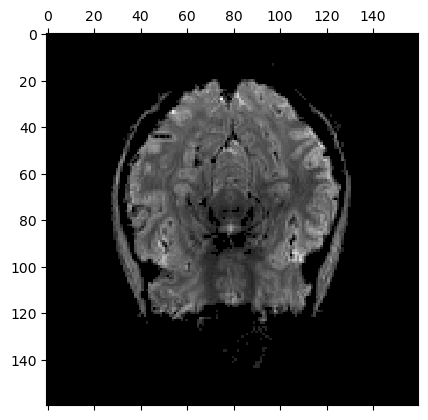

In [7]:
import numpy as np
temp_img = brain_volumes[3][:,:,10]
ind = np.where(brain_volumes[3][:,:,10] < 200)
temp_img[ind] = 0


plt.matshow(temp_img.T, cmap='gray')

In [8]:
brain_volumes[0][30,30,6]

88.4

(array([1.47063e+05, 3.34149e+05, 7.29590e+04, 3.59350e+04, 2.14260e+04,
        1.34780e+04, 9.07400e+03, 6.61800e+03, 5.32400e+03, 4.33700e+03,
        4.00900e+03, 3.74600e+03, 3.42000e+03, 3.57200e+03, 4.08300e+03,
        4.77200e+03, 5.73400e+03, 6.69700e+03, 7.89000e+03, 8.95500e+03,
        1.00870e+04, 1.15780e+04, 1.27590e+04, 1.31990e+04, 1.25340e+04,
        1.19800e+04, 1.17650e+04, 1.13040e+04, 1.09020e+04, 1.07680e+04,
        9.85700e+03, 9.50000e+03, 8.96800e+03, 8.05400e+03, 7.56300e+03,
        6.93000e+03, 6.47000e+03, 5.63100e+03, 5.20800e+03, 4.38300e+03,
        4.01200e+03, 3.59400e+03, 3.04800e+03, 2.61700e+03, 2.22900e+03,
        1.93500e+03, 1.62500e+03, 1.38600e+03, 1.21400e+03, 1.04100e+03,
        8.84000e+02, 7.86000e+02, 6.88000e+02, 5.63000e+02, 4.84000e+02,
        3.94000e+02, 3.47000e+02, 2.87000e+02, 2.53000e+02, 2.42000e+02,
        1.86000e+02, 1.64000e+02, 1.25000e+02, 1.12000e+02, 9.30000e+01,
        9.10000e+01, 7.20000e+01, 7.20000e+01, 5.10

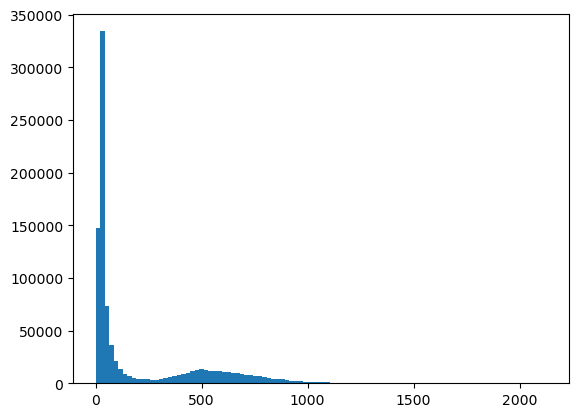

In [9]:
plt.hist(brain_volumes[0].flatten(), bins=100)

(160, 160, 36, 153)


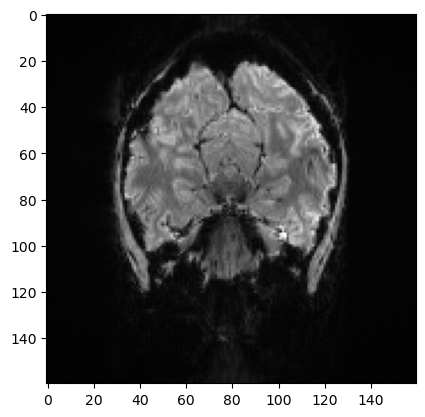

In [10]:
plt.imshow(brain_volumes[0][:,:,6].T , cmap='Greys_r')
print(data.shape)

In [11]:
mask = brain_volumes[0] != 0

In [12]:
brain_volumes[0][:,:,6].T

array([[ 0. , 16.6, 15.2, ..., 16.8, 16.8, 15.6],
       [ 0. , 16.8, 17.8, ..., 16.6, 19.8, 16.2],
       [ 0. , 16.2, 17.4, ..., 15.6, 16.4, 14.6],
       ...,
       [ 0. , 14.6, 15.8, ..., 14.4, 16.4, 17. ],
       [ 0. , 16. , 18.2, ..., 16.8, 13.8, 14.6],
       [ 0. , 16.6, 16. , ..., 15.6, 16. , 15.8]])

(160, 160, 36, 153)


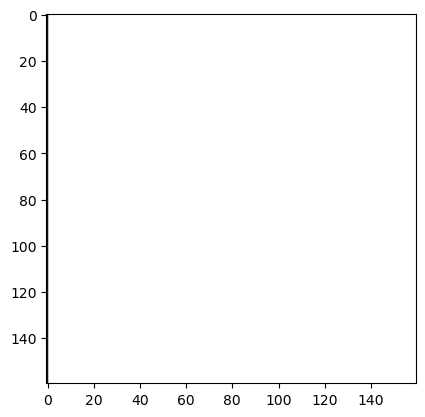

In [13]:
plt.imshow(mask[:,:,9].T, cmap='Greys_r')
print(data.shape)

In [14]:
from torch.utils.data import TensorDataset, DataLoader, Dataset
import numpy as np

class BrainDataset(Dataset):
    def __init__(self, brain_volumes, class_labels):
        self.brain_volumes = brain_volumes
        self.class_labels = class_labels

    def __len__(self):
        return len(self.class_labels)

    def __getitem__(self, idx):
        temp_img = brain_volumes[idx]
        ind = np.where(brain_volumes[idx] < 200)
        temp_img[ind] = 0
        temp_img = temp_img 
        return temp_img, self.class_labels[idx]

In [15]:
dataset = BrainDataset(brain_volumes, class_labels)

In [16]:
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

In [17]:
classes = ['ambient', 'symphonic', 'country', 'rocknroll','metal' ]
acts = [0,0,0,0,0]
counts = [0,0,0,0,0]
avg = 0
for i, data in enumerate(dataloader):
    vol = data[0][0]
    label = data[1].item()
    acts[label] = acts[label] + vol
    counts[label] = counts[label] + 1
    avg = avg + vol

In [18]:
for i in range(5):
    avg[i] = avg[i] / counts[i]

In [19]:
counts

[120, 120, 120, 120, 120]

In [40]:
depth = 20
threshold = 90000

In [41]:
img.max()

tensor(103557.0833, dtype=torch.float64)

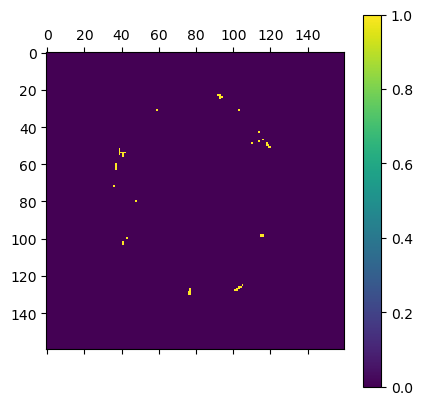

In [42]:
img= acts[0][:,:,depth]
ind = np.where(img > threshold)
tmp = np.zeros_like(img)
tmp[ind] =  1
plt.matshow((tmp.T))
plt.colorbar()

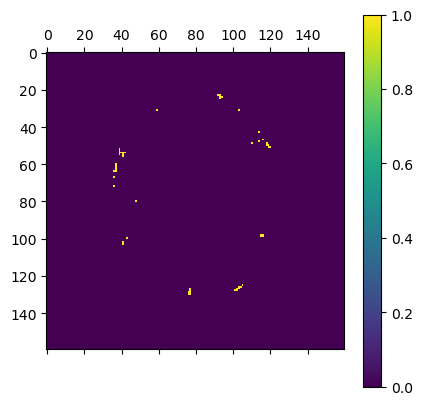

In [43]:
img= acts[1][:,:,depth]
ind = np.where(img > threshold)
tmp = np.zeros_like(img)
tmp[ind] =  1
plt.matshow((tmp.T))
plt.colorbar()

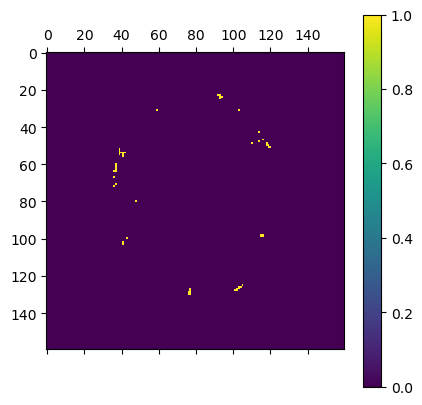

In [44]:
img= acts[2][:,:,depth]
ind = np.where(img > threshold)
tmp = np.zeros_like(img)
tmp[ind] =  1
plt.matshow((tmp.T))
plt.colorbar()

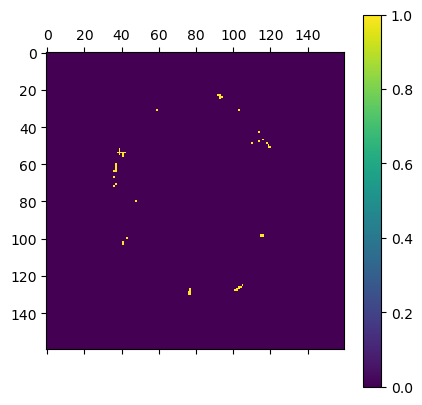

In [45]:
img= acts[3][:,:,depth]
ind = np.where(img > threshold)
tmp = np.zeros_like(img)
tmp[ind] =  1
plt.matshow((tmp.T))
plt.colorbar()

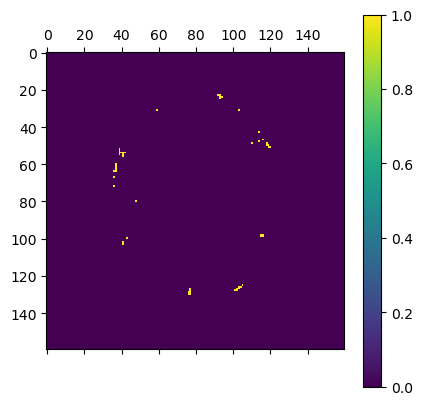

In [46]:
img= acts[4][:,:,depth]
ind = np.where(img > threshold)
tmp = np.zeros_like(img)
tmp[ind] =  1
plt.matshow((tmp.T))
plt.colorbar()

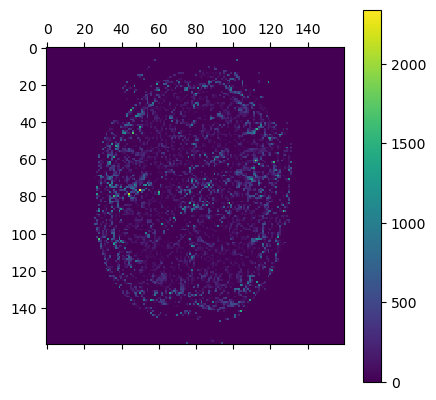

In [47]:
a = acts[3][:,:,depth] - acts[4][:,:,depth]
a[np.where(a< 0)] = 0
plt.matshow(a.T)
plt.colorbar()

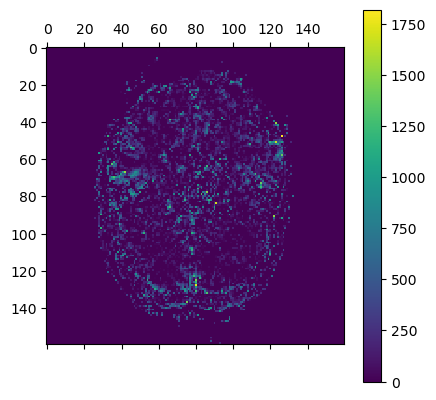

In [50]:
depth=20
a = acts[4][:,:,depth] - acts[1][:,:,depth]
a[np.where(a< 0)] = 0
plt.matshow(a.T)
plt.colorbar()